In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read csv file
data = pd.read_csv('bmi.csv')
data

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,Overweight
737,44,1.91,106.90,29.302925,Overweight
738,25,1.82,88.40,26.687598,Overweight
739,35,1.88,98.50,27.868945,Overweight


In [21]:
#  Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dtype: int64


In [22]:
# Step 2: Check for duplicate rows
duplicates = data.duplicated().sum()
print("\nDuplicate Rows:", duplicates)


Duplicate Rows: 0


In [23]:
# drop na values 
data.dropna()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,Overweight
737,44,1.91,106.90,29.302925,Overweight
738,25,1.82,88.40,26.687598,Overweight
739,35,1.88,98.50,27.868945,Overweight


In [8]:
# Function to display descriptive statistics and correlations for numerical columns
def describe_data(data):
    """
    Display descriptive statistics, skewness, kurtosis, and correlations of the dataset's numeric columns.
    """
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    print("Descriptive Statistics:")
    print(numeric_data.describe())
    print("\nSkewness:\n", numeric_data.skew())
    print("\nKurtosis:\n", numeric_data.kurtosis())
    print("\nCorrelation Matrix:")
    print(numeric_data.corr())

# Call the updated function
describe_data(data)

Descriptive Statistics:
              Age      Height      Weight         Bmi
count  741.000000  741.000000  741.000000  741.000000
mean    31.618084    1.709427   78.412497   26.365427
std     11.655466    0.085974   32.254547    9.223191
min     15.000000    1.460000   25.900000   12.150497
25%     22.000000    1.670000   63.000000   22.129740
50%     29.000000    1.721000   72.900000   24.132412
75%     40.000000    1.751000   83.300000   27.249306
max     61.000000    2.070000  270.000000   66.301350

Skewness:
 Age       0.578546
Height   -0.390655
Weight    2.005903
Bmi       1.717363
dtype: float64

Kurtosis:
 Age      -0.657029
Height    1.708360
Weight    6.538108
Bmi       3.239886
dtype: float64

Correlation Matrix:
             Age    Height    Weight       Bmi
Age     1.000000  0.023128  0.109610  0.139157
Height  0.023128  1.000000  0.607672  0.433309
Weight  0.109610  0.607672  1.000000  0.966921
Bmi     0.139157  0.433309  0.966921  1.000000


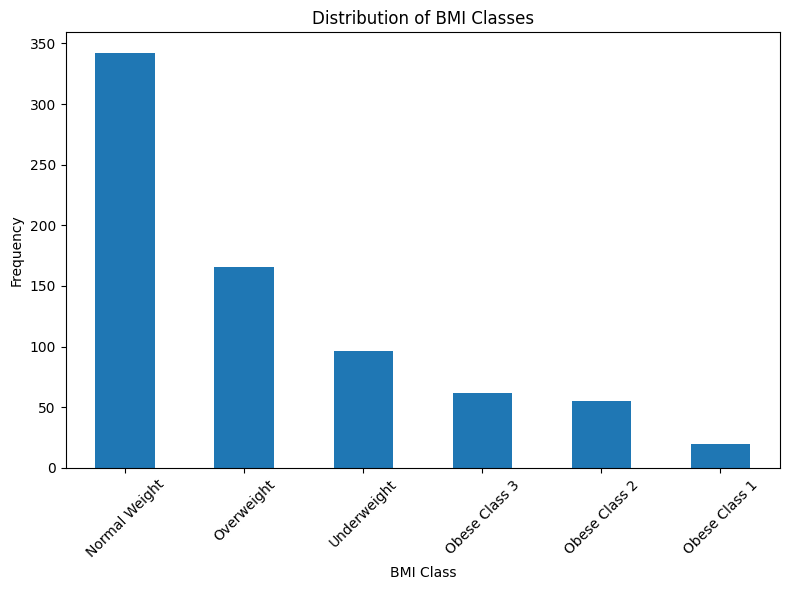

In [15]:
# Function to plot the BMI class distribution (Categorical Graph)
def plot_bmi_class_distribution(data):
    """Create a bar chart to show the distribution of BMI classes."""
    
    plt.figure(figsize=(8, 6))
    data['BmiClass'].value_counts().plot(kind='bar')
    plt.title('Distribution of BMI Classes')
    plt.xlabel('BMI Class')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plot_bmi_class_distribution(data)

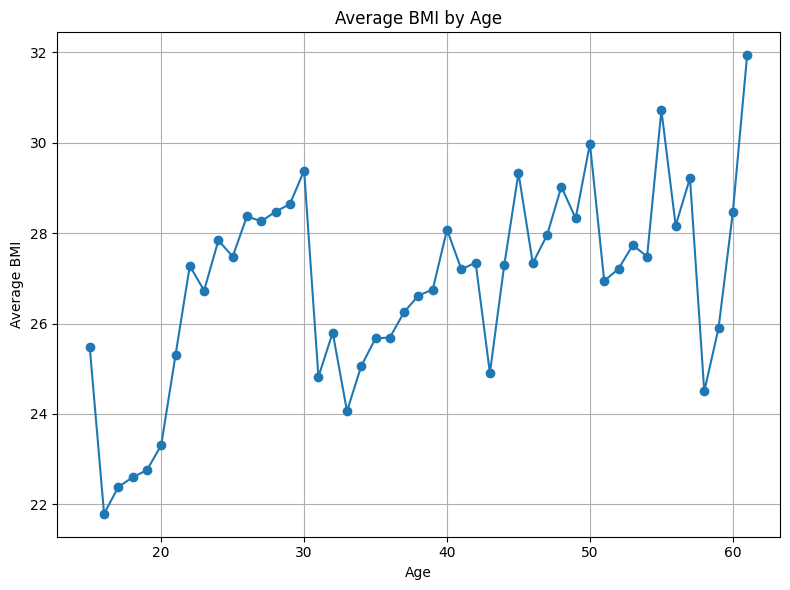

In [17]:
# Function to plot average BMI by Age (Line Graph)
def plot_avg_bmi_by_age(data):
    """Create a line graph showing the average BMI by Age."""
    
    # Calculate the average BMI for each age
    avg_bmi_by_age = data.groupby('Age')['Bmi'].mean()
    
    plt.figure(figsize=(8, 6))
    avg_bmi_by_age.plot(kind='line', marker='o')
    plt.title('Average BMI by Age')
    plt.xlabel('Age')
    plt.ylabel('Average BMI')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plot_avg_bmi_by_age(data)

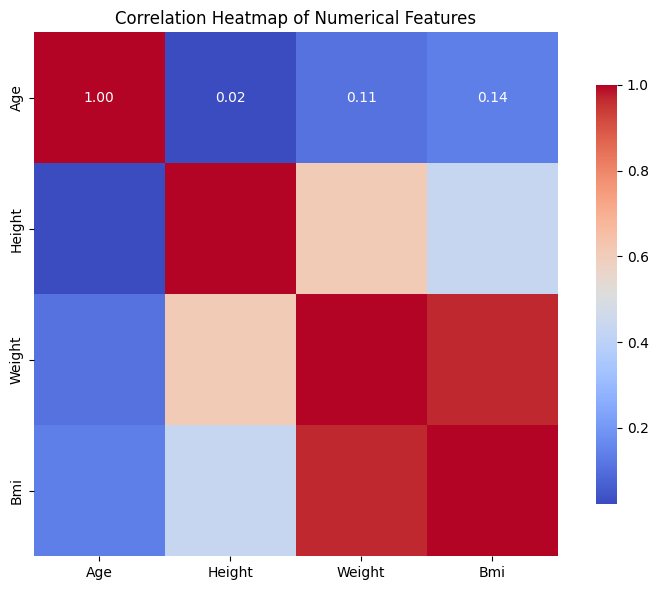

In [20]:
# Function to plot the correlation heatmap (Statistical Graph)
def plot_correlation_heatmap(data):
    """Generate a heatmap for the correlation matrix of numerical features."""
    
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Generate the correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={'shrink': .8})
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plot_correlation_heatmap(data)
